# Comparing Neha's and Hemanta's time-delay vs magnification plots

In [ ]:
# This was used to generate the data

# from ler.rates import LeR

# ler = LeR(npool=8,
#           verbose=False, 
#           event_type='BNS', 
#           mtot_max=51,  # for SNR interpolation
#           z_max=5,
#           psds={'L1':'custom_psd.txt'},
#           snr_type="interpolation",
#           source_priors=dict(source_frame_masses='binary_masses_uniform',),
#           source_priors_params=dict(
#               source_frame_masses=dict(
#                   m_min=1,
#                   m_max=3,
#               ),
#           lens_priors=dict(
#             velocity_dispersion="velocity_dispersion_gengamma",
#             ),
#           lens_priors_params=dict(
#             velocity_dispersion=dict(a=2.32 / 2.67, c=2.67, vd_min=10, vd_max=350),
#             ),
#           ),
#           )

# # snr_cut=8.0
# # time will take long time sample
# ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, num_img=1,output_jsonfile='n_lensed_detectable_bns_uniformL1_new.json', meta_data_file='n_lensed_detectable_bns_uniformL1_new_meta.json', resume=True);

## Neha's way 

* Hemanta's data will be use here

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# call the LeR class
from ler.rates import LeR
from ler.utils import get_param_from_json
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [19]:
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_uniformL1_new.json")

lensed_params_detectable.keys()

# select according to arrival time
dt_eff = lensed_params_detectable['time_delays']

dt11 = abs(dt_eff[:,0]-dt_eff[:,0])/ (24*3600)
dt12 = abs(dt_eff[:,1]-dt_eff[:,0])/ (24*3600)
dt13 = abs(dt_eff[:,2]-dt_eff[:,0])/ (24*3600)
dt14 = abs(dt_eff[:,3]-dt_eff[:,0])/ (24*3600)

mu = lensed_params_detectable['magnifications']


#===== CUT applied on individal detetctor SNRs================================#
snr_L = lensed_params_detectable['L1']

snr_th_1 = 8
snr_th_2 = 4

plottype = '.pdf'
savepath = './'

cut_1 = ((snr_L[:,0]>snr_th_1) + (snr_L[:,1]>snr_th_1) + (snr_L[:,2]>snr_th_1) + (snr_L[:,3]>snr_th_1))
cut_2 = ((snr_L[:,0]>snr_th_2) + (snr_L[:,1]>snr_th_2) + (snr_L[:,2]>snr_th_2) + (snr_L[:,3]>snr_th_2))

cut = cut_1*cut_2

#dt11 = dt11[cut]  ###these will all be zero
dt12 = dt12[cut]
dt13 = dt13[cut]
dt14 = dt14[cut]

log_t12 = np.log10(dt12)
log_t13 = np.log10(dt13)
log_t14 = np.log10(dt14)



mu_0, mu_1, mu_2, mu_3 = mu.T
mu_1, mu_2, mu_3 = mu_1[cut], mu_2[cut], mu_3[cut]

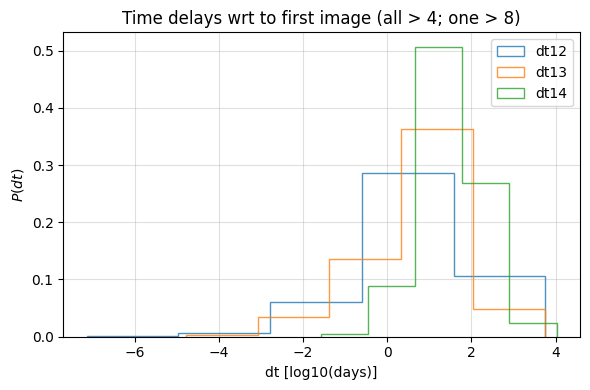

In [20]:
# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_t12, bins=5, alpha=0.8, label='dt12', density=True, histtype='step')
plt.hist(log_t13, bins=5, alpha=0.8, label='dt13', density=True, histtype='step')
plt.hist(log_t14, bins=5, alpha=0.8, label='dt14', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image (all > %s; one > %s)'%(snr_th_2, snr_th_1))
plt.tight_layout()
plt.savefig(savepath +'td_rel_hist'+ plottype)
plt.show()
plt.close()

In [21]:
#lensed
dt_final = np.hstack((dt12, dt13, dt14))
mu_final = np.hstack((mu_1, mu_2, mu_3))

del dt11, dt12, dt13, dt14, mu_0, mu_1, mu_2, mu_3

#lensed
log_mu = np.log10(abs(mu_final))

log_dt = np.log10(dt_final)

cut = ~np.isnan(log_dt)

log_dt, log_mu = log_dt[cut], log_mu[cut]

# Perform a kernel density estimation (KDE)
xy = np.vstack([log_dt, log_mu])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels1 = np.percentile(kde, [10, 40, 68, 95])

# Create a grid for contour plot
xgrid = np.linspace(min(log_dt), max(log_dt), 1000)
ygrid = np.linspace(min(log_mu), max(log_mu), 1000)
X, Y = np.meshgrid(xgrid, ygrid)
Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

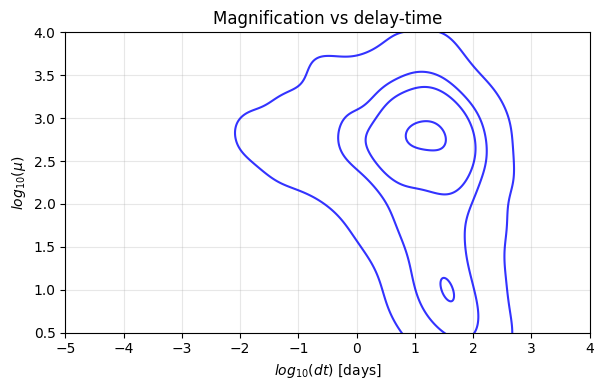

In [34]:
# Plotting
plt.figure(figsize=(6, 4))
plt.contour(X, Y, Z, levels=levels1, colors=['blue', 'blue', 'blue', 'blue', 'blue'], alpha=0.8)

plt.xlabel("$log_{10}(dt)$ [days]")
plt.ylabel(r"$log_{10}(\mu)$")
plt.title('Magnification vs delay-time')
plt.tight_layout()
# plt.colorbar(contour1, label='Density')
plt.xlim(-5, 4)
#plt.xlim(-3, 2.5)
plt.ylim(0.5, 4)
plt.grid(alpha=0.3)
# Add legend
# Create proxy artists for legend
#proxy1 = plt.Line2D([0], [0], linestyle='-', color='blue', label='Unlensed (snr>%s)'%(snr_th))
#proxy2 = plt.Line2D([0], [0], linestyle='-', color='red', label='Lensed (>2 img, snrs>%s)'%(snr_th))
#plt.legend(handles=[proxy1, proxy2])
plt.savefig(savepath +'dt_mag_log_at_least_one_4'+ plottype)
plt.show()
plt.close()

## Hemanta's way

In [1]:
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_uniformL1_new.json")

### For Image 1 and 2

In [2]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt12 = dt[:,1]-dt[:,0]
mu1 = abs(mu[:,0])
mu2 = abs(mu[:,1])

# check nan values in mu
idx_nan = (~np.isnan(mu2)) & (~np.isnan(mu1))
snr1 = lensed_params_detectable['optimal_snr_net'][:,0]
snr2 = lensed_params_detectable['optimal_snr_net'][:,1]

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
idx_snr8 = (snr1>8) | (snr2>8)
idx_snr4 = (snr1>4) & (snr2>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# true lensed events
dt12 = dt12[idx]
mu1 = mu1[idx]
mu2 = mu2[idx]
mu1_12 = mu1
mu2_12 = mu2

### For Image 1 and 3

In [3]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt13 = dt[:,2]-dt[:,0]
mu1 = abs(mu[:,0])
mu3 = abs(mu[:,2])

# check nan values in mu
idx_nan = (~np.isnan(mu3)) & (~np.isnan(mu1))

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
snr1 = lensed_params_detectable['optimal_snr_net'][:,0]
snr3 = lensed_params_detectable['optimal_snr_net'][:,2]
idx_snr8 = (snr1>8) | (snr3>8)
idx_snr4 = (snr1>4) & (snr3>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# trim data
dt13 = dt13[idx]
mu1 = mu1[idx]
mu3 = mu3[idx]
mu1_13 = mu1
mu3_13 = mu3

### For Image 1 and 4

In [4]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt14 = dt[:,3]-dt[:,0]
mu1 = abs(mu[:,0])
mu4 = abs(mu[:,3])

# check nan values in mu
idx_nan = (~np.isnan(mu4)) & (~np.isnan(mu1))

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
snr1 = lensed_params_detectable['optimal_snr_net'][:,0]
snr4 = lensed_params_detectable['optimal_snr_net'][:,3]
idx_snr8 = (snr1>8) | (snr4>8)
idx_snr4 = (snr1>4) & (snr4>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# trim data
dt14 = dt14[idx]
mu1 = mu1[idx]
mu4 = mu4[idx]
mu1_14 = mu1
mu4_14 = mu4

### For Image 2 and 3

In [5]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt23 = dt[:,2]-dt[:,1]
mu2 = abs(mu[:,1])
mu3 = abs(mu[:,2])

# check nan values in mu
idx_nan = (~np.isnan(mu3)) & (~np.isnan(mu2))
snr3 = lensed_params_detectable['optimal_snr_net'][:,2]
snr2 = lensed_params_detectable['optimal_snr_net'][:,1]

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
idx_snr8 = (snr2>8) | (snr3>8)
idx_snr4 = (snr2>4) & (snr3>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# trim data
dt23 = dt23[idx]
mu2 = mu2[idx]
mu3 = mu3[idx]
mu2_23 = mu2
mu3_23 = mu3

### For Image 2 and 4

In [6]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt24 = dt[:,3]-dt[:,1]
mu2 = abs(mu[:,1])
mu4 = abs(mu[:,3])

# check nan values in mu
idx_nan = (~np.isnan(mu4)) & (~np.isnan(mu2))

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
snr4 = lensed_params_detectable['optimal_snr_net'][:,3]
snr2 = lensed_params_detectable['optimal_snr_net'][:,1]
idx_snr8 = (snr2>8) | (snr4>8)
idx_snr4 = (snr2>4) & (snr4>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# trim data
dt24 = dt24[idx]
mu2 = mu2[idx]
mu4 = mu4[idx]
mu2_24 = mu2
mu4_24 = mu4

### For Image 3 and 4

In [7]:
mu = lensed_params_detectable['magnifications']
dt = lensed_params_detectable['time_delays']

dt34 = dt[:,3]-dt[:,2]
mu3 = abs(mu[:,2])
mu4 = abs(mu[:,3])

# check nan values in mu
idx_nan = (~np.isnan(mu4)) & (~np.isnan(mu3))

# Apply conditions: one of the SNR should be greater than 8 and both should be greater than 4
snr3 = lensed_params_detectable['optimal_snr_net'][:,2]
snr4 = lensed_params_detectable['optimal_snr_net'][:,3]
idx_snr8 = (snr3>8) | (snr4>8)
idx_snr4 = (snr3>4) & (snr4>4)
idx_snr = idx_snr8 & idx_snr4
idx = idx_nan & idx_snr

# trim data
dt34 = dt34[idx]
mu3 = mu3[idx]
mu4 = mu4[idx]
mu3_34 = mu3
mu4_34 = mu4

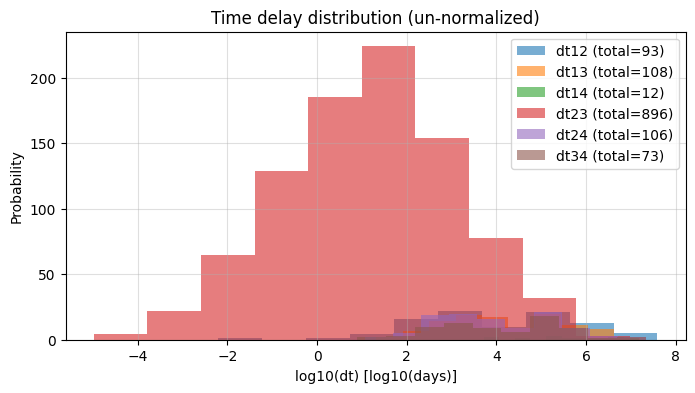

In [8]:
## plot time delays for all the combinations
plt.figure(figsize=(8,4))
plt.hist(np.log10(dt12), bins=10, alpha=0.6, density=False, label='dt12 (total={})'.format(len(dt12)))
plt.hist(np.log10(dt13), bins=10, alpha=0.6, density=False, label='dt13 (total={})'.format(len(dt13)))
plt.hist(np.log10(dt14), bins=10, alpha=0.6, density=False, label='dt14 (total={})'.format(len(dt14)))
plt.hist(np.log10(dt23), bins=10, alpha=0.6, density=False, label='dt23 (total={})'.format(len(dt23)))
plt.hist(np.log10(dt24), bins=10, alpha=0.6, density=False, label='dt24 (total={})'.format(len(dt24)))
plt.hist(np.log10(dt34), bins=10, alpha=0.6, density=False, label='dt34 (total={})'.format(len(dt34)))
plt.xlabel('log10(dt) [log10(days)]')
plt.ylabel('Probability')
plt.title('Time delay distribution (un-normalized)')
#plt.xlim(-3.0, 8.0)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

* this shows image 2-3 combination dominates the detectable lensed events

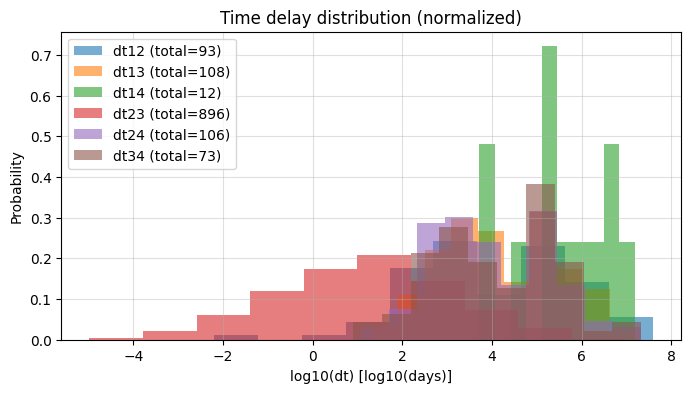

In [9]:
# plot
plt.figure(figsize=(8,4))
plt.hist(np.log10(dt12), bins=10, alpha=0.6, density=True, label='dt12 (total={})'.format(len(dt12)))
plt.hist(np.log10(dt13), bins=10, alpha=0.6, density=True, label='dt13 (total={})'.format(len(dt13)))
plt.hist(np.log10(dt14), bins=10, alpha=0.6, density=True, label='dt14 (total={})'.format(len(dt14)))
plt.hist(np.log10(dt23), bins=10, alpha=0.6, density=True, label='dt23 (total={})'.format(len(dt23)))
plt.hist(np.log10(dt24), bins=10, alpha=0.6, density=True, label='dt24 (total={})'.format(len(dt24)))
plt.hist(np.log10(dt34), bins=10, alpha=0.6, density=True, label='dt34 (total={})'.format(len(dt34)))
plt.xlabel('log10(dt) [log10(days)]')
plt.ylabel('Probability')
plt.title('Time delay distribution (normalized)')
#plt.xlim(-3.0, 8.0)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### Combine all the data

In [10]:
dt_all = np.concatenate([dt12, dt12, dt13, dt13, dt14, dt14, dt23, dt23, dt24, dt24, dt34, dt34])
mu_all = np.concatenate([mu1_12, mu2_12, mu1_13, mu3_13, mu1_14, mu4_14, mu2_23, mu3_23, mu2_24, mu4_24, mu3_34, mu4_34])
np.shape(dt_all), np.shape(mu_all)

((2576,), (2576,))

In [11]:
# make a kde and plot contour
from scipy.stats import gaussian_kde

x = np.log10(dt_all)
y = np.log10(mu_all)

# Perform a kernel density estimation (KDE)
xy = np.vstack([x, y])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels1 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(x), max(x), 1000)
ygrid = np.linspace(min(y), max(y), 1000)
X1, Y1 = np.meshgrid(xgrid, ygrid)
Z1 = gaussian_kde(xy)(np.vstack([X1.ravel(), Y1.ravel()])).reshape(X1.shape)

In [27]:
# fit the data to the power law
# This is wrt to Smith et al. 2022. It states that source positions near the fold caustic lead to high magnification (e.g. for BNS case), giving low time delay with the shown relation.
# fit the data to the power law
from scipy.optimize import curve_fit

def func(log10_mu, a):
    mu = 10**log10_mu
    return np.log10(a*mu**-3)

mu_for_fit = np.log10(mu_all[mu_all>100])
dt_for_fit = np.log10(dt_all[mu_all>100])
popt, pcov = curve_fit(func, mu_for_fit, dt_for_fit)
print(popt)

[1.34267176e+10]


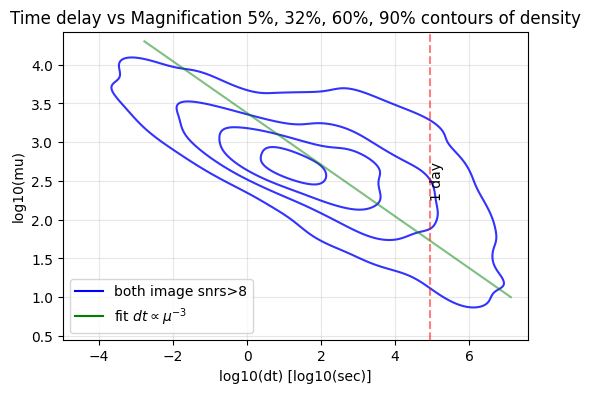

In [28]:
# Plotting
plt.figure(figsize=(6, 4))
plt.contour(X1, Y1, Z1, levels=levels1, colors=['blue', 'blue', 'blue', 'blue', 'blue'], alpha=0.8)

# fit line plot
# plot dt\propto mu^-3 relation
mu_ = np.linspace(10, 20000, 1000)
plt.plot(func(np.log10(mu_), popt[0]), np.log10(mu_), alpha=0.5, color='g', label=r'fit $dt\propto \mu^{-3}$')

plt.ylabel('log10(mu)')
plt.xlabel('log10(dt) [log10(sec)]')
plt.title('Time delay vs Magnification 5%, 32%, 60%, 90% contours of density')
# plt.colorbar(contour1, label='Density')
# plt.xlim(-5, 6)
# plt.ylim(1.5, 4.5)
plt.grid(alpha=0.3)
# Add legend
# Create proxy artists for legend
proxy1 = plt.Line2D([0], [0], linestyle='-', color='blue', label='both image snrs>8')
proxy2 = plt.Line2D([0], [0], linestyle='-', color='g', label='fit $dt\propto \mu^{-3}$')
plt.legend(handles=[proxy1, proxy2])

# include vertical lines that shows log10(1 day) and log10(10 days) and log10(100 days)
# also write labels 1day and 10 days and 100 days, vertically
# convert seconds to days
plt.axvline(np.log10(24*3600), color='r', linestyle='--', alpha=0.5)
plt.text(np.log10(24*3600), 2.5, '1 day', rotation=90, verticalalignment='center')

plt.show()